In [3]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file1 = '/content/drive/My Drive/DSA210/happines_index.csv'
file2 = '/content/drive/My Drive/DSA210/unemployment_analysis.csv'

df_h = pd.read_csv(file1)
df_u = pd.read_csv(file2, usecols = ["Country Name", "2018"])
#Since our dataset is based on 2018. We need only unemployment rate for 2018.

Mounted at /content/drive


In [4]:

df_h.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [5]:
df_u.head()

,Country Name,2018
0,Africa Eastern and Southern,6.73
1,Afghanistan,11.15
2,Africa Western and Central,6.04
3,Angola,7.42
4,Albania,12.30


In [6]:
def cleaning(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df
cleaning(df_h)
cleaning(df_u)

df_u = df_u.rename(columns={'2018': 'unemployment_rate'})
df_h = df_h.rename(columns={'country_or_region': 'country_name'})

df_u.drop_duplicates(inplace=True)
df_h.drop_duplicates(inplace=True)

df_h.head()

,overall_rank,country_name,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [7]:
df_u.head()

,country_name,unemployment_rate
0,Africa Eastern and Southern,6.73
1,Afghanistan,11.15
2,Africa Western and Central,6.04
3,Angola,7.42
4,Albania,12.30


In [8]:
combined_df = pd.merge(df_h, df_u, on='country_name', how='inner')
combined_df.head()

,overall_rank,country_name,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,unemployment_rate
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,7.36
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,3.80
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,5.13
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.70
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,4.71


In [9]:
combined_df.to_csv('/content/drive/My Drive/DSA210/combined_data.csv', index=False)

**Exploratory Data Analysis**

Since we created new dataset which is totally cleaned and standarised for using, we can start our exploratory data analysis. In this part, we determine how happines score is related with other parameters.



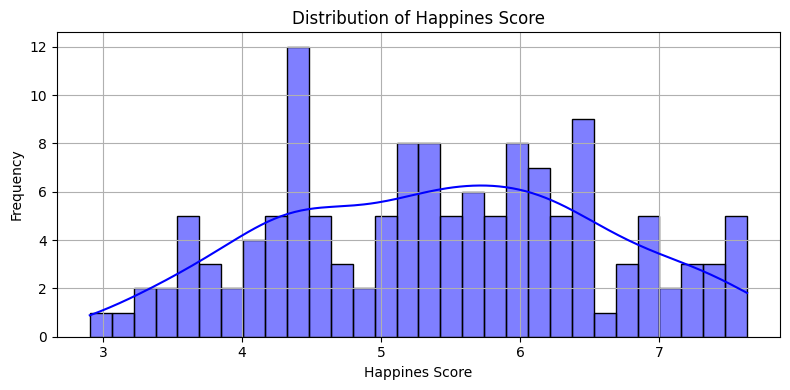

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4))
sns.histplot(combined_df['score'], kde=True, bins=30, color='blue')
plt.title(f'Distribution of Happines Score')
plt.xlabel("Happines Score")
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

**Distribution of Happines Score**

Here is distribution of happines score for all countries.

Now we will explore correlation between happines and our other parameters with correlation matrix.

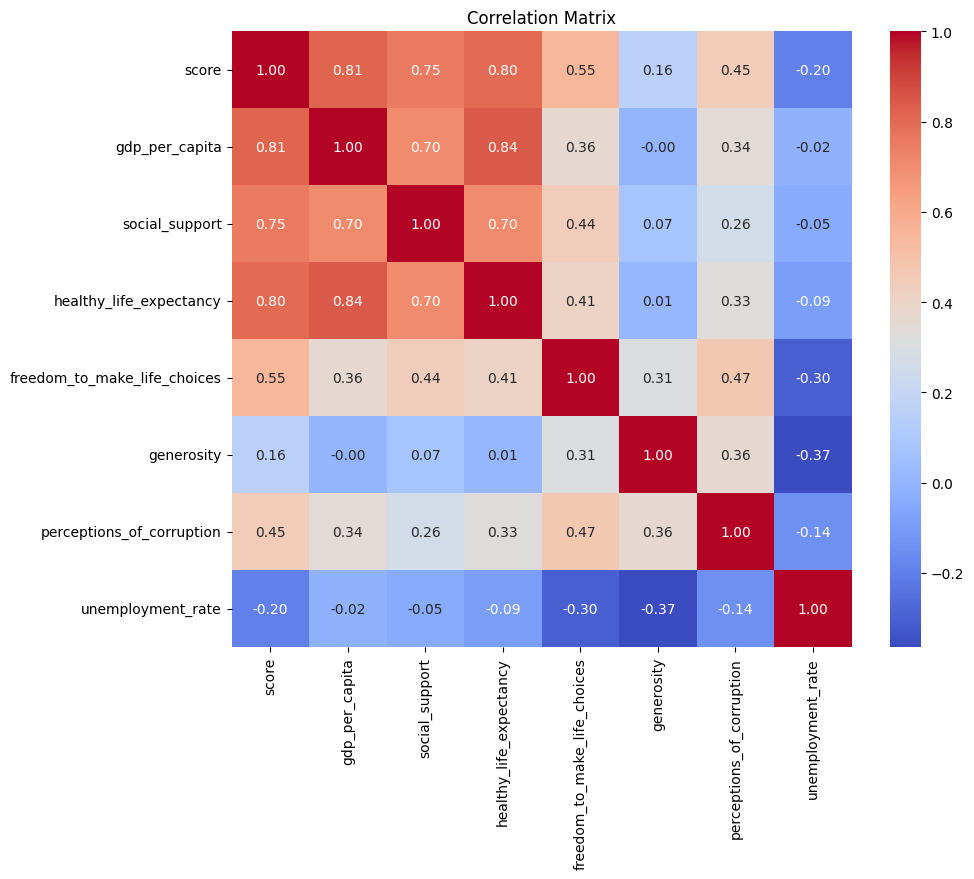

In [11]:
columns_for_correlation = ['score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption','unemployment_rate']

correlation_matrix = combined_df[columns_for_correlation].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Correlation Matrix**

- We can see strong and weak relationships from this correlation matrix.

- GDP per capita is one of the most important thing for happines. Also, these have strong correlation between healthy life expectancy.

We can understand that GDP per capita and healthy life expectancy are crucial aspects for happines.

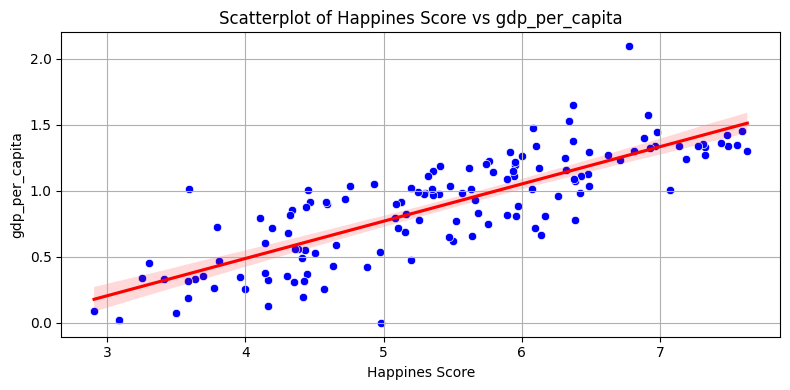

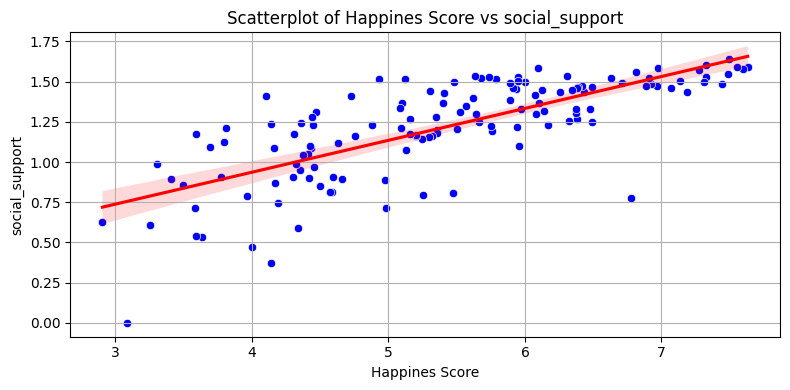

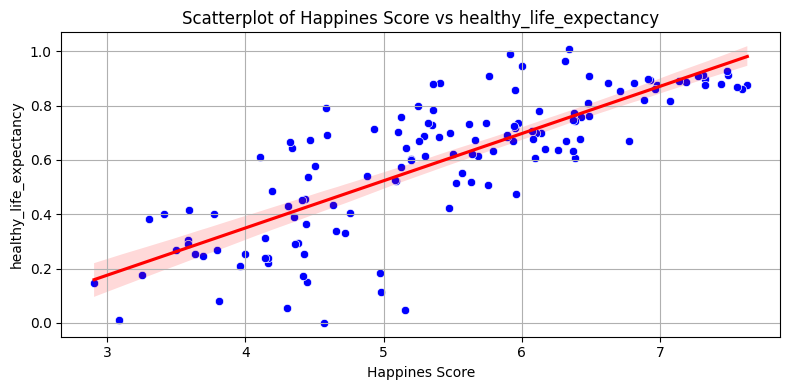

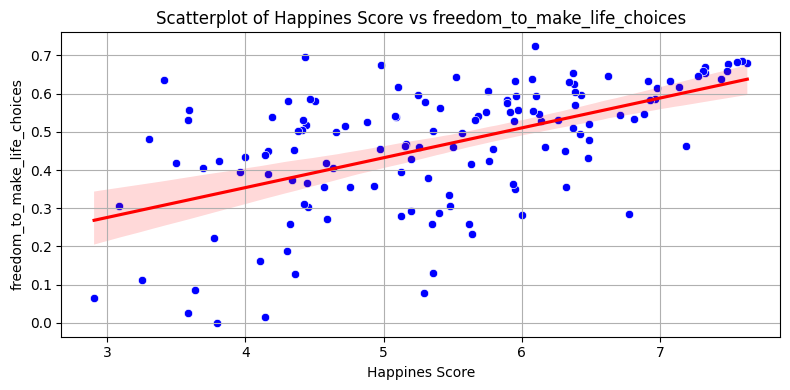

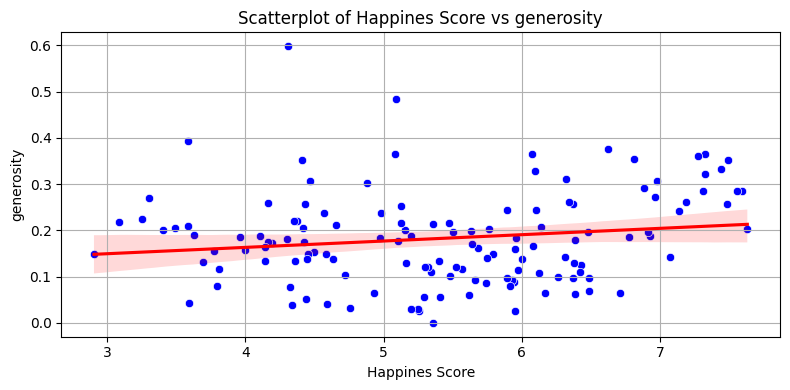

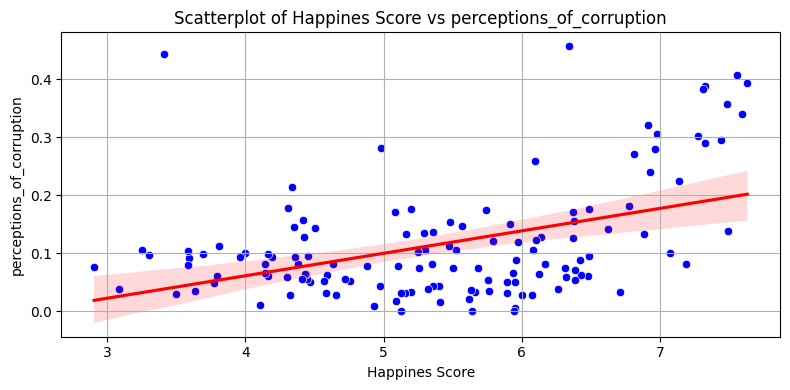

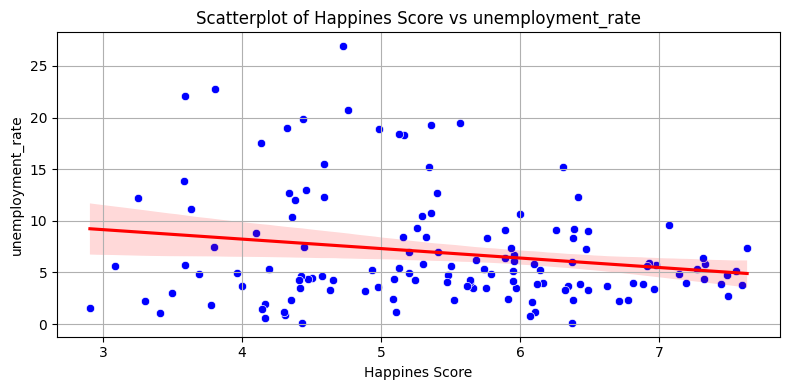

In [12]:
#Now we look at relations between happines score and other parameters by scatterplot

columns_for_relation = [ 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption','unemployment_rate']

for column in columns_for_relation:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x='score', y=column, data=combined_df, color='blue')
    sns.regplot(x='score', y=column, data=combined_df, scatter=False, color='red')
    plt.title(f'Scatterplot of Happines Score vs {column}')
    plt.xlabel("Happines Score")
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Happiness Score vs. GDP per Capita**

The scatterplot shows a positive correlation between happiness score and GDP per capita. As GDP per capita increases, the happiness score generally tends to increase. The red regression line also indicates this positive trend.

**Happiness Score vs. Social Support**

There appears to be a strong positive correlation between happiness score and social support. Countries with higher levels of social support tend to have higher happiness scores.

**Happiness Score vs. Healthy Life Expectancy**

Similar to GDP per capita, there is a positive correlation between happiness score and healthy life expectancy. As healthy life expectancy increases, the happiness score generally rises.

**Happiness Score vs. Freedom to Make Life Choices**

The scatterplot suggests a positive relationship between happiness score and freedom to make life choices. Countries where individuals have more freedom in their life choices tend to report higher happiness levels.

**Happiness Score vs. Generosity**

 The relationship between happiness score and generosity appears to be weaker compared to the other factors. While there might be a slight positive trend, the points are more scattered, indicating a less strong correlation.

**Happiness Score vs. Unemployment Rate**

The relationshio between happines score and unemployment rate is weak and correlated negatively. There is a weak and negative correlation between happiness score and unemployment rate


### **Hypothesis Testing**

To determine whether each explanatory factor such as GDP per capita, healthy life expectancy, social support, freedom, generosity, and perceived corruption is genuinely linked to the Happiness Index, we conduct Pearson correlation analyses. For every variable-happiness pair, we calculate the Pearson correlation coefficient and we will perform a two tailed significance test.

In [17]:
from scipy.stats import pearsonr

results = []

for column in columns_for_relation:
    correlation, p_value = pearsonr(combined_df['score'], combined_df[column])
    results.append((column, correlation, p_value))

results_df = pd.DataFrame(results, columns=['Variable', 'Correlation', 'P-value'])

#Shows p-value is higher or lower han 0.05
results_df['Significant_P_value'] = results_df['P-value'].apply(lambda x: 'yes' if x < 0.05 else 'no')

# Round the 'Correlation' and 'P-value' columns
results_df['Correlation'] = results_df['Correlation'].round(2)
results_df['P-value'] = results_df['P-value'].round(4)


print(results_df)

                       Variable  Correlation  P-value Significant_P_value
0                gdp_per_capita         0.81   0.0000                 yes
1                social_support         0.75   0.0000                 yes
2       healthy_life_expectancy         0.80   0.0000                 yes
3  freedom_to_make_life_choices         0.55   0.0000                 yes
4                    generosity         0.16   0.0686                  no
5     perceptions_of_corruption         0.45   0.0000                 yes
6             unemployment_rate        -0.20   0.0224                 yes


**Relationships**: For variables where the 'Significant_P_value' is 'yes', the Pearson correlation analysis suggests a statistically significant relationship between that variable and the happiness score at a 0.05 significance level. This means we can be reasonably confident that the observed correlation is not due to random chance. You should observe that variables like gdp_per_capita, social_support, healthy_life_expectancy, and freedom_to_make_life_choices likely fall into this category, based on the scatterplot analysis.

**Non-Significant Relationships**: For variables where the 'Significant_P_value' is 'no', the p-value is greater than 0.05. This indicates that, based on this statistical test, we do not have enough evidence to conclude a statistically significant linear relationship between that variable and the happiness score. Variables like generosity and perceptions_of_corruption might fall into this category, though the correlation matrix and scatterplots might suggest some degree of relationship, it might not be statistically significant based on the p-value threshold.

**Interpreting the Correlation**: For the variables with a significant relationship, the 'Correlation' value indicates the strength and direction of the linear relationship. A positive value means that as the variable increases, the happiness score tends to increase. A negative value means that as the variable increases, the happiness score tends to decrease. The closer the absolute value of the correlation is to 1, the stronger the linear relationship.

**Unemployment Rate**: Based on the expectation that unemployment rate has a negative relationship with happiness, and if its p-value is significant, you can conclude there's a statistically significant negative correlation. If the p-value is not significant, then you cannot conclude a statistically significant linear relationship based on this test.

In summary, the hypothesis testing provides a statistical basis to support or refute the observed relationships from the exploratory data analysis. It helps determine which factors have a statistically significant linear association with the happiness score.